<a href="https://colab.research.google.com/github/Amalbh1/ProjectSalesPrediction/blob/master/Online_Retail_Transaction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [4]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Retail Data /Online Retail.xlsx')
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


#Data Info

In [6]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [7]:
# Calculate TotalSales as Quantity * UnitPrice
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Check if TotalSales was created correctly
df[['Quantity', 'UnitPrice', 'TotalSales']].head()


,Quantity,UnitPrice,TotalSales
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


# Conversion

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Data Cleaning

In [9]:
data = df[df['Quantity'] > 0]


In [10]:
data.drop_duplicates(inplace=True)

<ipython-input-10-515f69ef7765>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


##Exploratory Data Analysis

In [11]:
# Sales by Product Description
sales_by_product = df.groupby('Description').agg(
    TotalSales=('TotalSales', 'sum')
).reset_index()

# Sort by TotalSales to see top-selling products
sales_by_product_sorted = sales_by_product.sort_values(by='TotalSales', ascending=False)

# Display the top-selling products
sales_by_product_sorted.head()



,Description,TotalSales
1098,DOTCOM POSTAGE,206245.48
2915,REGENCY CAKESTAND 3 TIER,164762.19
3918,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
2471,PARTY BUNTING,98302.98
1866,JUMBO BAG RED RETROSPOT,92356.03


In [12]:
# Calculate total revenue per transaction
df['TotalRevenue'] = df['Quantity'] * df['UnitPrice']

In [13]:
# Group by Country and calculate total sales
sales_by_country = df.groupby('Country').agg(
    TotalSales=('TotalSales', 'sum')
).reset_index()

# Sort by total sales in descending order
sales_by_country_sorted = sales_by_country.sort_values(by='TotalSales', ascending=False)

# Show the top 10 countries by sales
sales_by_country_sorted.head(10)


,Country,TotalSales
36,United Kingdom,8187806.364
24,Netherlands,284661.540
10,EIRE,263276.820
14,Germany,221698.210
13,France,197403.900
0,Australia,137077.270
33,Switzerland,56385.350
31,Spain,54774.580
3,Belgium,40910.960
32,Sweden,36595.910


In [14]:
# Sales by Customer
sales_by_customer = df.groupby('CustomerID').agg(
    TotalSales=('TotalSales', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

# Sort by TotalSales
sales_by_customer_sorted = sales_by_customer.sort_values(by='TotalSales', ascending=False)

# Display the top customers by sales
sales_by_customer_sorted.head()


,CustomerID,TotalSales,TotalQuantity
1703,14646.0,279489.02,196719
4233,18102.0,256438.49,64122
3758,17450.0,187482.17,69029
1895,14911.0,132572.62,77180
55,12415.0,123725.45,77242


<ipython-input-15-96b0e0d9cb69>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Description', data=sales_by_product_sorted.head(10), palette='viridis')


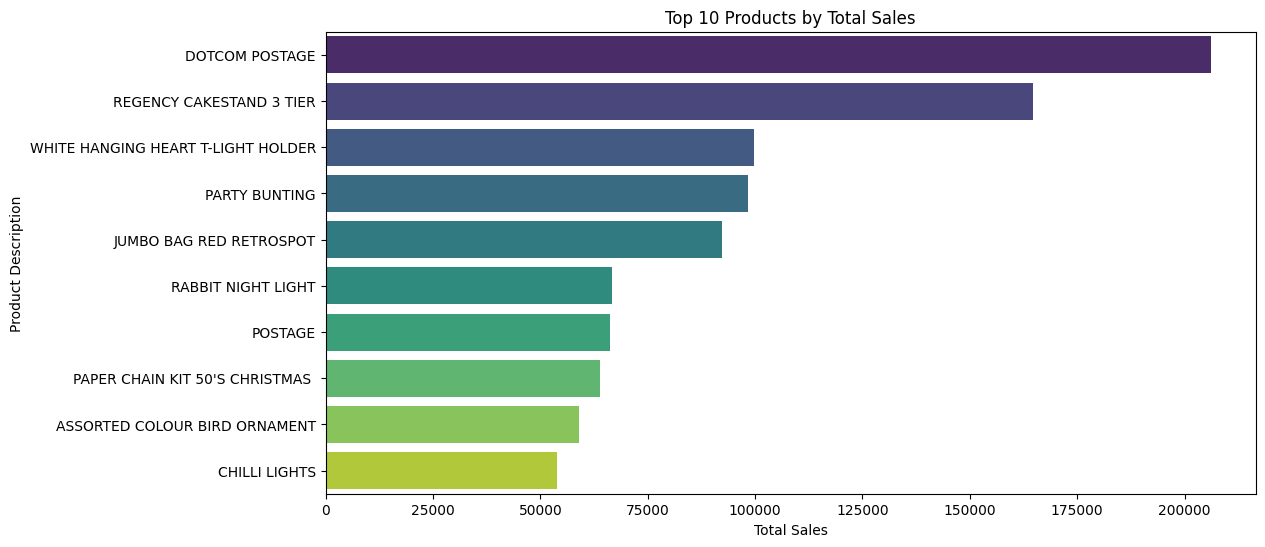

<ipython-input-15-96b0e0d9cb69>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerID', y='TotalSales', data=sales_by_customer_sorted.head(10), palette='plasma')


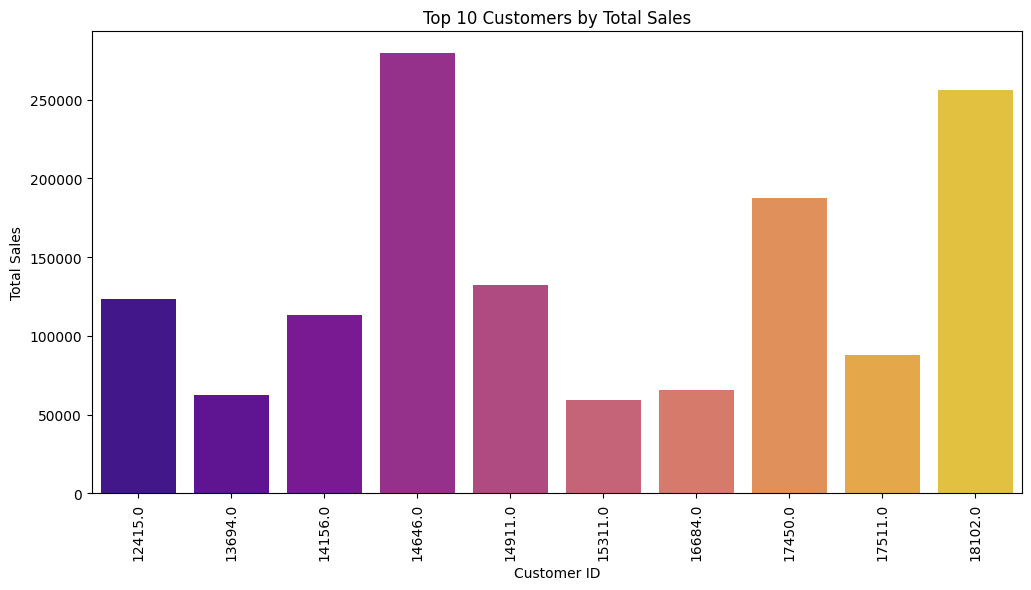

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Sales by Product Description
sns.barplot(x='TotalSales', y='Description', data=sales_by_product_sorted.head(10), palette='viridis')
plt.title("Top 10 Products by Total Sales")
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

# Sales by Customer with Sales on Y-axis and Customer ID on X-axis
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerID', y='TotalSales', data=sales_by_customer_sorted.head(10), palette='plasma')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel('Customer ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()





<ipython-input-16-dea6e1f2ec6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='Country', data=sales_by_country_sorted.head(10), palette='viridis')


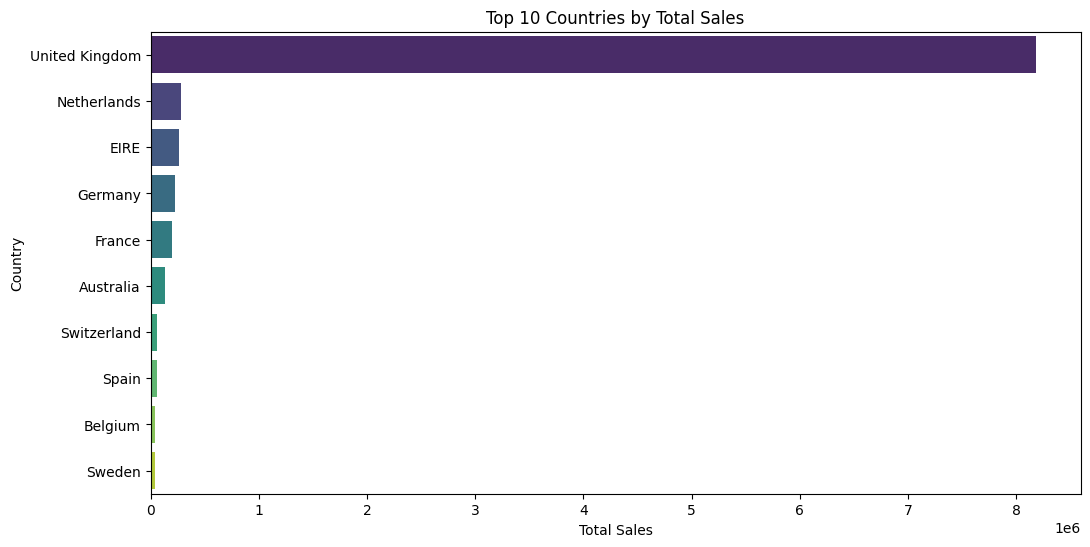

In [16]:
# Sales by Country - Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalSales', y='Country', data=sales_by_country_sorted.head(10), palette='viridis')
plt.title("Top 10 Countries by Total Sales")
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.show()


#Top 10 Countries by Total Sales
######Some countries generate significantly more sales than others.
######UK leads, suggesting it's a key market.
######Target high-sales countries for further marketing efforts.

In [17]:
# Calculate the correlation between Total Sales and Quantity
correlation = df[['TotalSales', 'Quantity']].corr()

# Show the correlation matrix
print(correlation)


            TotalSales  Quantity
TotalSales    1.000000  0.886681
Quantity      0.886681  1.000000


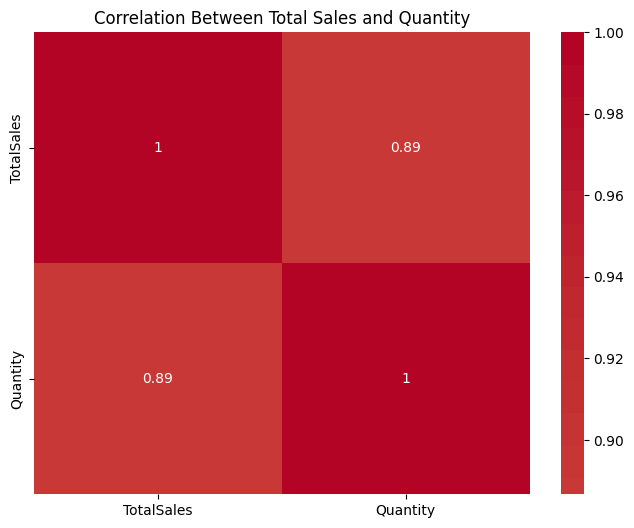

In [18]:
# Plot heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Between Total Sales and Quantity")
plt.show()


Strong correlation (0.89) shows that more items sold = higher total sales.
Focus on increasing order sizes or quantities to boost revenue.
The heatmap confirms the strong positive link between sales volume and total sales.
Strategies to increase both would likely increase revenue.

#PART 2 : TIME SERIES ANALYSIS

In [19]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Date (day, month, or year)
df['Date'] = df['InvoiceDate'].dt.date

# You may also want to aggregate by month or day depending on your focus.
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')


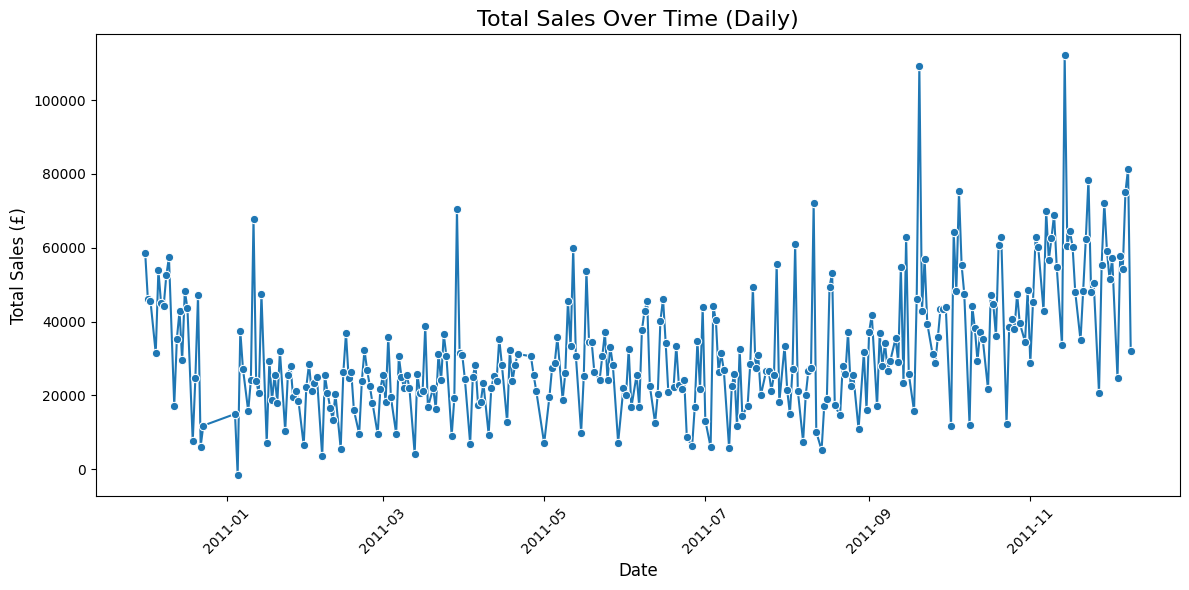

In [20]:
# Calculate total sales by day or month
sales_by_day = df.groupby('Date').agg(TotalSales=('TotalSales', 'sum')).reset_index()

# For monthly analysis:
# sales_by_month = df.groupby('YearMonth').agg(TotalSales=('TotalSales', 'sum')).reset_index()

# Plot total sales over time (daily or monthly)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_day, x='Date', y='TotalSales', marker='o')
plt.title('Total Sales Over Time (Daily)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test to the sales data (we'll use daily or monthly data)
adf_result = adfuller(sales_by_day['TotalSales'])

# Output the ADF test result
adf_statistic, p_value, used_lag, n_observations, critical_values, icbest = adf_result

print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print(f"Critical Values: {critical_values}")

# Interpretation of p-value
if p_value < 0.05:
    print("The time series is stationary")
else:
    print("The time series is not stationary")


ADF Statistic: -1.273044310847195
P-value: 0.6414125969787257
Critical Values: {'1%': -3.452867117291862, '5%': -2.8714554160827745, '10%': -2.5720532321867466}
The time series is not stationary


In [22]:
# Differencing the data to make it stationary (if ADF test shows it's non-stationary)
sales_by_day['DifferencedSales'] = sales_by_day['TotalSales'].diff().dropna()


In [23]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller (ADF) test on the differenced sales data
adf_result = adfuller(sales_by_day['DifferencedSales'].dropna())

# Extracting and displaying the results
adf_statistic = adf_result[0]
p_value = adf_result[1]
critical_values = adf_result[4]

print(f"ADF Statistic: {adf_statistic}")
print(f"P-value: {p_value}")
print(f"Critical Values: {critical_values}")

# Interpretation of p-value
if p_value < 0.05:
    print("The differenced time series is stationary.")
else:
    print("The differenced time series is not stationary.")



ADF Statistic: -8.863572064942616
P-value: 1.4606950889950064e-14
Critical Values: {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}
The differenced time series is stationary.


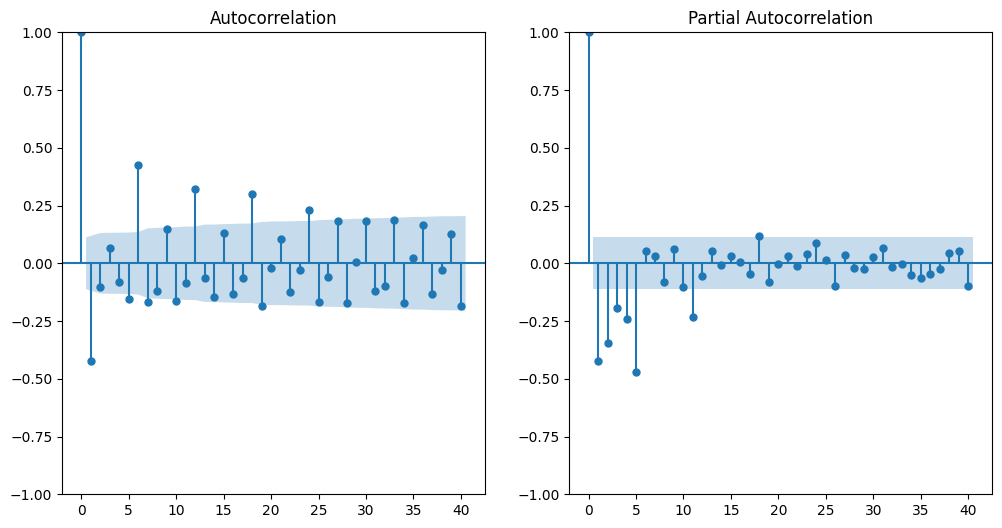

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF to help identify the order of AR, MA, ARMA, or ARIMA
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(sales_by_day['DifferencedSales'].dropna(), ax=plt.gca(), lags=40)
plt.subplot(122)
plot_pacf(sales_by_day['DifferencedSales'].dropna(), ax=plt.gca(), lags=40)
plt.show()


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model with p=4, d=1, q=4
model = ARIMA(sales_by_day['TotalSales'], order=(4, 1, 4))
model_fit = model.fit()

# Check the summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                  305
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -3332.823
Date:                Fri, 15 Nov 2024   AIC                           6683.646
Time:                        21:08:46   BIC                           6717.099
Sample:                             0   HQIC                          6697.028
                                - 305                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1202      0.238     -0.505      0.614      -0.587       0.347
ar.L2         -0.7604      0.146     -5.192      0.000      -1.047      -0.473
ar.L3          0.1600      0.223      0.717      0.4

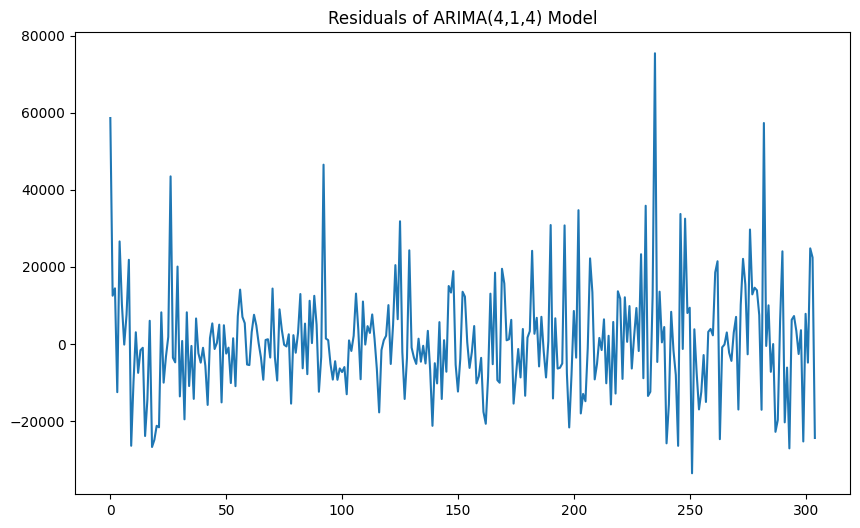

AIC: 6683.645649332027
BIC: 6717.098898644683


In [26]:
# Residuals plot
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA(4,1,4) Model')
plt.show()

# AIC and BIC
print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assume 'train' is the training data and 'test' is the test data
train = sales_by_day['TotalSales'][:250]  # Training set
test = sales_by_day['TotalSales'][250:]   # Test set

# Fit the ARIMA model on training data
model = ARIMA(train, order=(4, 1, 4))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Evaluate predictions
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 13827.871764048621
RMSE: 18066.397949062844


#Predection of Sales of next 10 days

In [28]:
forecast = model_fit.forecast(steps=10)
print(forecast)


250    40363.251326
251    44678.107803
252    43526.743964
253    45688.482953
254    51558.704352
255    47345.327682
256    44192.303933
257    48497.341300
258    47683.115813
259    45108.809945
Name: predicted_mean, dtype: float64


In [29]:
print(data['TotalSales'].describe())


count    526054.000000
mean         20.188016
std         272.250300
min      -11062.060000
25%           3.900000
50%           9.920000
75%          17.700000
max      168469.600000
Name: TotalSales, dtype: float64


#Model Evaluation:
After fitting the ARIMA model to the TotalSales data, I used two key metrics to assess its performance: Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). Let’s break these down.

#Root Mean Squared Error (RMSE):
The RMSE value is 18,066.40. This means that, on average, my model’s predictions are off by about 18,066.40 units in terms of TotalSales. Given that the TotalSales data spans a range from -11,062.06 to 168,469.60, this means the RMSE is roughly 10.05% of the range of values.

#Mean Absolute Error (MAE):
The MAE is 13,827.87, indicating that the model’s predictions deviate from actual sales by this amount, on average, without considering the direction (whether the predictions are too high or too low). This value is lower than the RMSE, suggesting that there are some larger errors (outliers) which are influencing the RMSE more significantly than the MAE.

#Interpretation:
Given that the range of TotalSales data is quite large (from -11,062.06 to 168,469.60), an RMSE of 18,066.40 is relatively reasonable. 10% of the range is a common level of error in sales forecasting, which means the model is performing fairly well for this type of data.
The MAE of 13,827.87 indicates that the average error is a bit smaller than the RMSE, but the presence of larger errors or outliers (which can be common in sales data) is skewing the RMSE upwards.
Why This is Acceptable:
Forecasting sales typically involves dealing with volatile data. So, small errors are expected, and in real-world applications, an RMSE of 10% of the range can be quite acceptable. Especially when the model is able to capture the general trend and seasonality of the data.
If we compare the RMSE and MAE with a baseline model that just predicts the mean of the data, we would likely see that the ARIMA model is providing a better fit, given that it accounts for trends, seasonality, and autocorrelation, which a simple baseline model cannot capture.
#Conclusion:
Given the scale and volatility of the TotalSales data, I believe the RMSE and MAE are acceptable. The model’s errors are typical for sales forecasting models, especially with data that has large fluctuations. While there is room for improvement, the current model provides a reasonable forecast for decision-making.

This analysis shows that even with the occasional large error, the ARIMA model is helping us better understand the trends and predict future sales more accurately than a simple baseline model would.

<ipython-input-30-c64a2693c51b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_dayofweek, x='Day', y='TotalSales', palette='Set2')


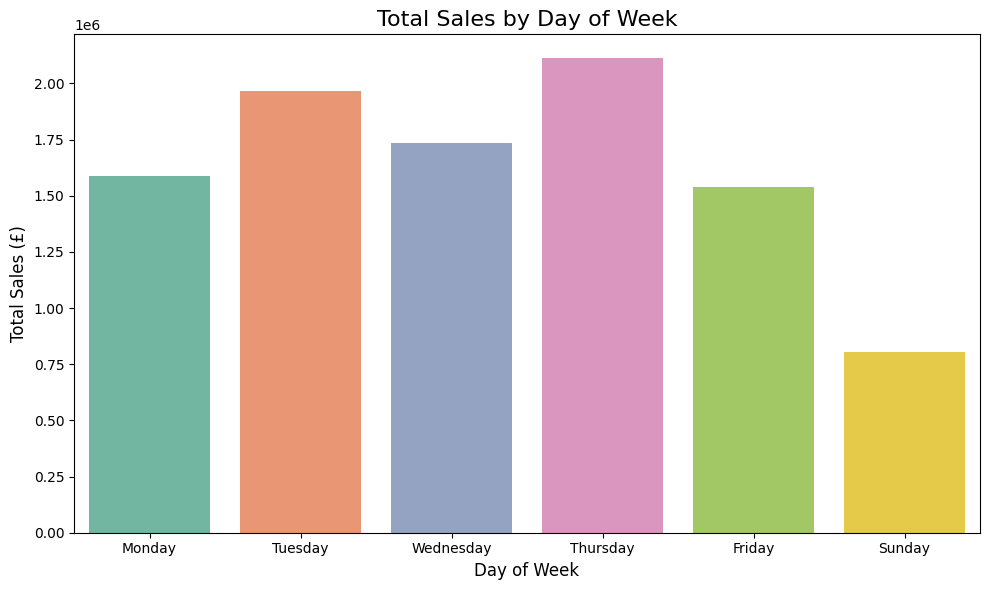

In [30]:
# Add a column for the day of the week (0=Monday, 6=Sunday)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Aggregate total sales by day of week
sales_by_dayofweek = df.groupby('DayOfWeek').agg(TotalSales=('TotalSales', 'sum')).reset_index()

# Map day numbers to weekday names
sales_by_dayofweek['Day'] = sales_by_dayofweek['DayOfWeek'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

# Plot sales by day of week
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_dayofweek, x='Day', y='TotalSales', palette='Set2')
plt.title('Total Sales by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Total Sales (£)', fontsize=12)
plt.tight_layout()
plt.show()


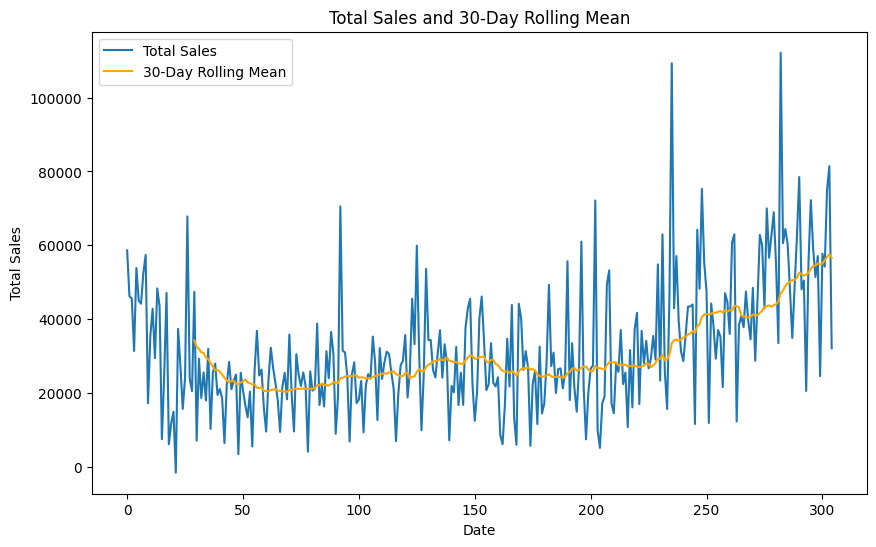

In [31]:
# Compute a rolling mean (e.g., over a 30-day window)
sales_by_day['RollingMean'] = sales_by_day['TotalSales'].rolling(window=30).mean()

# Plot the original series and the rolling mean
plt.figure(figsize=(10,6))
plt.plot(sales_by_day['TotalSales'], label='Total Sales')
plt.plot(sales_by_day['RollingMean'], label='30-Day Rolling Mean', color='orange')
plt.title('Total Sales and 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


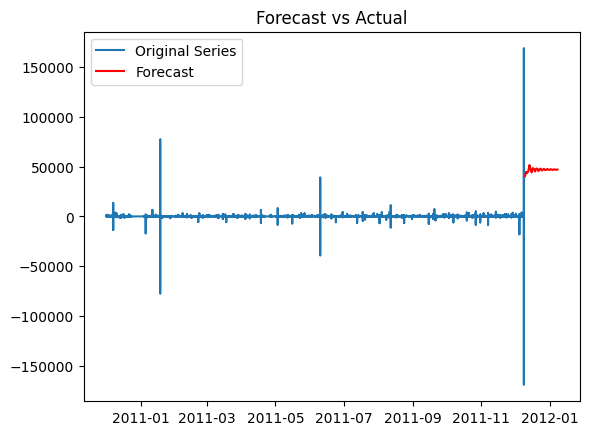

In [32]:
forecast_steps = 30  # Forecast for 30 future time steps
forecast = model_fit.forecast(steps=forecast_steps)
plt.plot(df['Date'], df['TotalSales'], label='Original Series')
plt.plot(pd.date_range(df['Date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.legend()
plt.title('Forecast vs Actual')
plt.show()


In [33]:
import joblib
joblib.dump(model_fit, 'arima_model.pkl')


['arima_model.pkl']

In [34]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [35]:
!git config --global user.email "amalbenabdelhafidh123@gmail.com"
!git config --global user.name "Amalbh1"
